Data cleaning process
1. Excluded the foloowing columns using intituition:
    a. SERIAL NUMBER
    b. ADMISSION NUMBER
    c. DATE OF ADMISSION
    d. DATE OF DISCHARGE
    e. RURAL(R) /URBAN(U)
    f. TYPE OF ADMISSION-EMERGENCY/OPD 
    g. MONTH YEAR
    h. DURATION OF STAYDURATION OF INTENSIVE UNIT STAY
    i. OUTCOME
2. Excluded the folowing rows:
    a. row 3252 because CHEST INFECTION has a value of '\\'
3. Converted the following columns from non-numeric to numberic:
    a. 


<h1 style="background-color:rgba(88, 139, 174, 0.6);">Import Libraries</h1>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import warnings
import os
import math
import numpy as np
from pandas.api.types import is_numeric_dtype


#global settings
warnings.filterwarnings("ignore")
sns.set_theme(rc={"figure.figsize":[15,3]})

<h1 style="background-color:rgba(88, 139, 174, 0.6);">Methods & Configs</h1>

In [2]:
resoure_directory= "../../resource"

def display_attributes_as_string(dataset_name, dataset):
    cols =  ""
    for name in dataset["Explanatory Name"]:
        cols += name.upper().strip() + ", "
    return '\033[1m' + '\033[4m' + dataset_name + '\033[0m' + "\n" + cols[:-2] + "\n\n"

<h1 style="background-color:rgba(88, 139, 174, 0.6);">Data Exploration</h1>

In [3]:
#columns
cvd_data_columns = pd.read_csv(os.path.join(resoure_directory, "table_headings.csv"))
cvd_data_columns

,Table Heading,Explanatory Name
0,SNO,Serial Number
1,MRD No.,Admission Number
2,D.O.A,Date of Admission
3,D.O.D,Date of Discharge
4,AGE,AGE
5,GENDER,GENDER
6,RURAL,RURAL(R) /Urban(U)
7,TYPE OF ADMISSION-EMERGENCY/OPD,TYPE OF ADMISSION-EMERGENCY/OPD
8,month year,month year
9,DURATION OF STAY,DURATION OF STAY


In [4]:
#exclude unused columns
exclude_columns = ["SNO", "MRD No.", "D.O.A", "D.O.D", "RURAL", "TYPE OF ADMISSION-EMERGENCY/OPD", "month year", "DURATION OF STAY",
"duration of intensive unit stay", "OUTCOME"]
cvd_data_columns_cleaned = cvd_data_columns[~cvd_data_columns["Table Heading"].isin(exclude_columns)] #[exclude_columns]
cvd_data_columns_cleaned

,Table Heading,Explanatory Name
4,AGE,AGE
5,GENDER,GENDER
12,SMOKING,SMOKING
13,ALCOHOL,ALCOHOL
14,DM,Diabetes Mellitus
15,HTN,Hypertension
16,CAD,Coronary Artery Disease
17,PRIOR CMP,CARDIOMYOPATHY
18,CKD,CHRONIC KIDNEY DISEASE
19,HB,Haemoglobin


In [5]:
#attribute summary
cvd_data_columns_exclude = cvd_data_columns[cvd_data_columns["Table Heading"].isin(exclude_columns)] #[exclude_columns]


print(display_attributes_as_string("ALL ATTRIBUTES",cvd_data_columns))
print(display_attributes_as_string("EXCLUDED ATTRIBUTES", cvd_data_columns_exclude))
print(display_attributes_as_string("REMAINING ATTRIBUTES",cvd_data_columns_cleaned))


ALL ATTRIBUTES
SERIAL NUMBER, ADMISSION NUMBER, DATE OF ADMISSION, DATE OF DISCHARGE, AGE, GENDER, RURAL(R) /URBAN(U), TYPE OF ADMISSION-EMERGENCY/OPD, MONTH YEAR, DURATION OF STAY, DURATION OF INTENSIVE UNIT STAY, OUTCOME, SMOKING, ALCOHOL, DIABETES MELLITUS, HYPERTENSION, CORONARY ARTERY DISEASE, CARDIOMYOPATHY, CHRONIC KIDNEY DISEASE, HAEMOGLOBIN, TOTAL LEUKOCYTES COUNT, PLATELETS, GLUCOSE, UREA, CREATININE, B-TYPE NATRIURETIC PEPTIDE, RAISED CARDIAC ENZYMES, EJECTION FRACTION, SEVERE ANAEMIA, ANAEMIA, STABLE ANGINA, ACUTE CORONARY SYNDROME, ST ELEVATION MYOCARDIAL INFARCTION, ATYPICAL CHEST PAIN, HEART FAILURE, HEART FAILURE WITH REDUCED EJECTION FRACTION, HEART FAILURE WITH NORMAL EJECTION FRACTION, VALVULAR HEART DISEASE, COMPLETE HEART BLOCK, SICK SINUS SYNDROME, ACUTE KIDNEY INJURY, CEREBROVASCULAR ACCIDENT INFRACT, CEREBROVASCULAR ACCIDENT BLEED, ATRIAL FIBRILATION, VENTRICULAR TACHYCARDIA, PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA, CONGENITAL HEART DISEASE, URINARY TRACT INFEC

In [6]:
#Dataset analysis
cvd_data = pd.read_csv(os.path.join(resoure_directory, "HDHI Admission data.csv"))
cvd_data_cleaned = cvd_data[cvd_data_columns_cleaned['Table Heading']]

#cvd_data_columns
cvd_data_cleaned

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,0,0,1,0,0,0,0,9.5,...,0,0,0,0,0,0,0,0,0,0
1,65,M,0,1,0,1,1,0,0,13.7,...,0,0,0,0,0,0,0,0,0,0
2,53,M,0,0,1,0,1,0,0,10.6,...,0,0,0,0,0,0,0,0,0,0
3,67,F,0,0,0,1,1,0,0,12.8,...,0,0,0,0,0,0,0,0,0,0
4,60,F,0,0,0,1,0,1,0,13.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,F,0,0,1,1,1,0,0,8.8,...,0,0,0,0,0,0,0,0,0,0
15753,50,M,0,0,1,1,0,1,0,13.2,...,0,0,0,0,0,0,0,0,0,0
15754,82,M,0,0,0,1,1,0,0,9.3,...,0,0,0,0,0,0,0,0,0,0
15755,59,F,0,0,0,1,1,0,0,13.1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#analyse non-numeric columns
print(cvd_data_cleaned.shape)
print("Numeric columns:",cvd_data_cleaned.describe().T.shape)
cvd_data_cleaned.describe().T

(15757, 46)
Numeric columns: (36, 8)


,count,mean,std,min,25%,50%,75%,max
AGE,15757.0,61.426160,13.420862,4.0,54.0,62.0,70.0,110.0
SMOKING,15757.0,0.050327,0.218625,0.0,0.0,0.0,0.0,1.0
ALCOHOL,15757.0,0.064797,0.246174,0.0,0.0,0.0,0.0,1.0
DM,15757.0,0.323475,0.467817,0.0,0.0,0.0,1.0,1.0
HTN,15757.0,0.485879,0.499816,0.0,0.0,0.0,1.0,1.0
CAD,15757.0,0.669607,0.470369,0.0,0.0,1.0,1.0,1.0
PRIOR CMP,15757.0,0.154471,0.361411,0.0,0.0,0.0,0.0,1.0
CKD,15757.0,0.098369,0.297822,0.0,0.0,0.0,0.0,1.0
RAISED CARDIAC ENZYMES,15757.0,0.198134,0.398606,0.0,0.0,0.0,0.0,1.0
SEVERE ANAEMIA,15757.0,0.019356,0.137779,0.0,0.0,0.0,0.0,1.0


In [8]:
#analyse non-numeric columns
cvd_data_cleaned[cvd_data_cleaned.columns[cvd_data_cleaned.applymap(np.isreal).sum() != 15757]].describe().T

,count,unique,top,freq
GENDER,15757,2,M,9990
HB,15505,182,12.6,300
TLC,15471,452,8.4,209
PLATELETS,15472,658,150,218
GLUCOSE,14894,521,110,270
UREA,15516,329,27,459
CREATININE,15510,471,0.8,1540
BNP,7316,1271,EMPTY,640
EF,14252,47,60,4386
CHEST INFECTION,15757,3,0,15415


<h1 style="background-color:rgba(88, 139, 174, 0.6);">Preprocess Data</h1>

In [9]:
#Analyze GENDER
column = 'GENDER'
print('Unique values for Gender:', cvd_data_cleaned[column].unique())
print('Unique values Counts:')
print(cvd_data_cleaned[column].value_counts())
cvd_data_cleaned['GENDER'].replace(['M', 'F'], [0,1], inplace=True)
print(cvd_data_cleaned[column].value_counts())

Unique values for Gender: ['M' 'F']
Unique values Counts:
M    9990
F    5767
Name: GENDER, dtype: int64
0    9990
1    5767
Name: GENDER, dtype: int64


In [19]:
column = 'HB'
print('Unique values for Gender:')
print(cvd_data_cleaned[column].unique())
print('Unique values Counts:')
print(cvd_data_cleaned[column].value_counts())

'''
cvd_data_cleaned['GENDER'].replace(['M', 'F'], [0,1], inplace=True)
print(cvd_data_cleaned[column].value_counts())
'''

Unique values for Gender:
['9.5' '13.7' '10.6' '12.8' '13.6' '13.5' '13.3' '12.6' nan '11.4' '13.2'
 '10.3' '13.8' '14.7' '11.6' '12.9' '15.2' '14.6' '10.8' '14.9' '12.7'
 '10.1' '12' '13' '8.5' '10.5' '10.2' '10' '13.1' '8.7' '11.3' '14.3'
 '16.3' '15.4' '12.1' '15.1' '12.5' '10.9' '14.8' '15.5' '11.8' '7.8'
 '14.2' '14.5' '16.6' '14.4' '17.1' '10.4' '16.9' '7.4' '15.3' '16.8' '9'
 '14' '12.4' '14.1' '7.2' '15.8' '11.2' '11.1' '9.2' '11.7' '9.7' '15.6'
 '16' '11.9' '12.2' '13.9' '8.6' '13.4' '8.9' '16.5' '18.7' '9.6' '7.5'
 '9.4' '9.9' '17.6' '7.9' '9.1' '10.7' '15.9' '12.3' '17.9' '17.3' '6.8'
 '16.1' '15' '9.3' '8.3' '8.4' '8.8' '15.7' '16.7' '4.5' '7.6' '11.5'
 '6.4' '7.1' '17.4' '8.2' '5.9' '5.3' '6.1' '17.2' '7' '11' '8' '17' '9.8'
 '18' '7.3' '16.4' '8.1' '16.2' '7.7' '17.7' '18.4' '5.7' '17.8' '6.7'
 '12.08' '5.4' '6.2' '18.2' '6.3' '19.5' '18.6' '5.5' '6.5' '17.5' '5.8'
 '4.4' '18.1' '19.8' '20.1' '4.7' '4.6' '19.2' '5.1' '4.3' '6' '5' '3.9'
 '22' '21.2' '6.09' '19.1' '6.9' 'E

"\ncvd_data_cleaned['GENDER'].replace(['M', 'F'], [0,1], inplace=True)\nprint(cvd_data_cleaned[column].value_counts())\n"

In [28]:
cvd_data_cleaned[column].isna().sum()

252

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,0,0,1,0,0,0,0,9.5,...,0,0,0,0,0,0,0,0,0,0
1,65,M,0,1,0,1,1,0,0,13.7,...,0,0,0,0,0,0,0,0,0,0
2,53,M,0,0,1,0,1,0,0,10.6,...,0,0,0,0,0,0,0,0,0,0
3,67,F,0,0,0,1,1,0,0,12.8,...,0,0,0,0,0,0,0,0,0,0
4,60,F,0,0,0,1,0,1,0,13.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,F,0,0,1,1,1,0,0,8.8,...,0,0,0,0,0,0,0,0,0,0
15753,50,M,0,0,1,1,0,1,0,13.2,...,0,0,0,0,0,0,0,0,0,0
15754,82,M,0,0,0,1,1,0,0,9.3,...,0,0,0,0,0,0,0,0,0,0
15755,59,F,0,0,0,1,1,0,0,13.1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Analyze HB
cvd_data_cleaned['CHEST INFECTION'].unique()

array(['0', '1', '\\'], dtype=object)

In [14]:
#get row(s) with \\
cvd_data_cleaned[cvd_data_cleaned['CHEST INFECTION'] == '\\']

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
3252,65,F,0,0,1,1,0,0,0,9.4,...,0,0,0,0,0,0,0,0,0,\


In [17]:
#Exclude row(s) with \\
cvd_data_cleaned = cvd_data_cleaned[cvd_data_cleaned['CHEST INFECTION'] != '\\']
cvd_data_cleaned.shape

(15756, 46)

<h1 style="background-color:rgba(88, 139, 174, 0.6);">Data Visualization</h1>

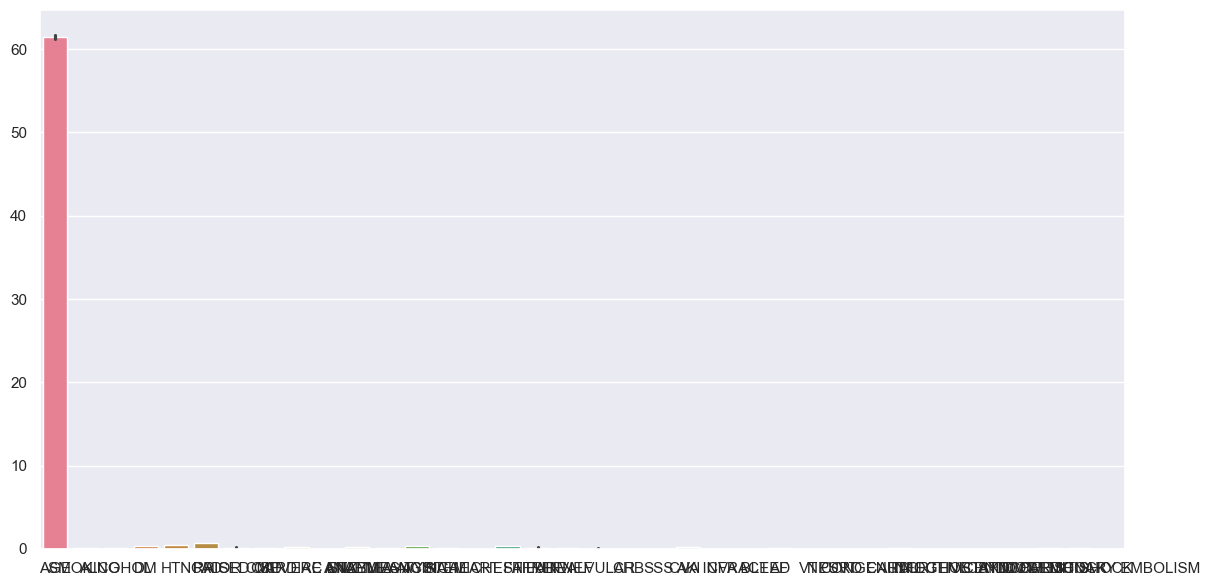

In [19]:
sns.set_theme(rc={"figure.figsize":[14,7]})
ax = sns.barplot(cvd_data_cleaned)
plt.show()

<h1 style="background-color:rgba(88, 139, 174, 0.6);">Data Preprocessing</h1>

In [ ]:
analysis: 
    - is na
    - duplicates

In [7]:
'''
data_meta_score_results.plot(kind = "bar", 
                             x="WikiName", 
                             y = data_meta_score_results.columns[data_meta_score_results.columns != "WikiName"],
                            figsize=(15,5)).legend(bbox_to_anchor=(0.8, 1.05))
plt.show()
'''

'\ndata_meta_score_results.plot(kind = "bar", \n                             x="WikiName", \n                             y = data_meta_score_results.columns[data_meta_score_results.columns != "WikiName"],\n                            figsize=(15,5)).legend(bbox_to_anchor=(0.8, 1.05))\nplt.show()\n'